In [318]:
import sys; sys.version_info

sys.version_info(major=2, minor=7, micro=17, releaselevel='final', serial=0)

In [40]:
import pandas as pd
import os
from collections import Counter

In [38]:
DATASET_DIR = os.environ.get('DATASET_DIR_COVID_UC')

### Load given dataframe

In [540]:
LABEL_COL = 'Resultado consenso BSTI'

In [172]:
fpath = os.path.join(DATASET_DIR, 'anonymus_match.xlsx')
main_df = pd.read_excel(fpath)
main_df.head()

,ID,Fecha consulta SU,SU,Edad,Sexo,Comuna,MC,Nº Antecedentes Morbidos,DM II,HTA,...,Unnamed: 59,Hb,Hcrto,Leucocitos,Plaquetas,Creatinina,PCR,Dimero D,LDH,Tiempo protrombina (INR)
0,1,2020-03-04,Marcoleta,71,1,1,Sintomas respiratorios altos,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-04-03,Marcoleta,35,0,1,Fiebre,0.0,0.0,0.0,...,NaN,"15,8","45,8","6,8",199,"0,85","0,56",328,206,NaN
2,3,2020-04-13,Marcoleta,74,0,1,Disnea,6.0,0.0,1.0,...,NaN,"13,3","41,2",17,301,"0,79","14,01",1655,667,NaN
3,4,2020-04-16,Marcoleta,49,1,1,COVID (+) exacerbacion,0.0,0.0,0.0,...,NaN,"12,7","37,5","5,6",385,"0,47","18,73","1285,2",436,"1,2"
4,5,2020-03-26,San Carlos,79,1,1,Disnea,3.0,0.0,1.0,...,NaN,"12,4",38,"8,6",305,"0,89","17,93",NaN,320,NaN


In [173]:
main_df.dropna(how='all', axis=1, inplace=True)

In [12]:
unnamed_cols = [c for c in main_df.columns if 'unnamed' in c.lower()]
unnamed_cols

['Unnamed: 51']

In [23]:
Counter(main_df['Clasificación BSTI'])

Counter({'Non-COVID': 10,
         'Indeterminado': 15,
         'Non COVID': 62,
         'indeterminado': 2,
         'Sugerente COVID': 26,
         'Indetrminado': 1,
         'normal': 144,
         'NON COVID': 1,
         'Normal': 378,
         'Probable COVID': 1})

In [24]:
Counter(main_df['Resultado consenso BSTI'])

Counter({'Indeterminado': 14,
         'Non-COVID': 75,
         'Normal': 525,
         'Sugerente COVID': 26})

In [42]:
main_df['PCR']

0        NaN
1       0,56
2      14,01
3      18,73
4      17,93
5      36,53
6       17,5
7       0,91
8       3,71
9       8,48
10     22,04
11      3,86
12       NaN
13     22,08
14     12,51
15       1,6
16      2,81
17      2,02
18      8,13
19     21,26
20      2,82
21     28,28
22      6,44
23       NaN
24      9,28
25       NaN
26      0,61
27     26,02
28       NaN
29      0,97
       ...  
610      NaN
611      NaN
612      NaN
613      NaN
614      NaN
615      NaN
616      NaN
617      NaN
618      NaN
619      NaN
620      NaN
621      NaN
622      NaN
623      NaN
624      NaN
625      NaN
626      NaN
627      NaN
628      NaN
629      NaN
630      NaN
631      NaN
632      NaN
633      NaN
634      NaN
635      NaN
636      NaN
637      NaN
638      NaN
639      NaN
Name: PCR, Length: 640, dtype: object

#### Check patients with _

In [208]:
patients_double = [v for v in main_df['ID'] if '_' in str(v)]
patients_double = list(set(v.split('_')[0] for v in patients_double))
patients_double

[u'24',
 u'214',
 u'505',
 u'141',
 u'185',
 u'37',
 u'449',
 u'133',
 u'246',
 u'498',
 u'135',
 u'178',
 u'90',
 u'294',
 u'365']

In [216]:
target_cols = ['Edad', 'Sexo']

for patient_id in patients_double:
    patients = [v for v in main_df['ID'] if str(v).split('_')[0] == str(patient_id)]
    sub_df = labels_df.loc[main_df['ID'].isin(patients)]
    
    for col in target_cols:
        values = set(sub_df[col])
        if len(values) != 1:
            print(patient_id, col, values, patients)

(u'185', 'Sexo', set([0, u'M']), [u'185', u'185_2'])
(u'37', 'Sexo', set([0, u'M']), [u'37_2', 37])


In [218]:
main_df.loc[main_df['ID'].isin(['185', '185_2', '185_3'])]

,ID,Fecha consulta SU,SU,Edad,Sexo,Comuna,MC,Nº Antecedentes Morbidos,DM II,HTA,...,Tiempo examen (h),Hb,Hcrto,Leucocitos,Plaquetas,Creatinina,PCR,Dimero D,LDH,Tiempo protrombina (INR)
184,185,2020-03-26,Marcoleta,74,0,1,Sintomas respiratorios altos,1.0,0.0,0.0,...,0,"13,7","40,7","7,7",200,"1,22","22,13",NaN,NaN,NaN
524,185_2,2020-03-11,Marcoleta,74,M,0,Hospitalizado por hemorragia cerebral,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check indeterminados

In [34]:
cols = ['Clasificación BSTI', 'Clasificación BSTI.1']
main_df.loc[main_df['Resultado consenso BSTI'] == 'Indeterminado'][cols]

,Clasificación BSTI,Clasificación BSTI.1
0,Non-COVID,Indeterminado
1,Indeterminado,non-COVID
2,Indeterminado,Indeterminado
3,Indeterminado,Indeterminado
4,Indeterminado,indeterminado
5,Non COVID,indeterminado
6,Indeterminado,normal
7,Indeterminado,non-COVID
8,Indeterminado,non-COVID
9,Indeterminado,non-COVID


### Read images

In [54]:
from collections import defaultdict

In [116]:
import pydicom
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
%run ../../utils/common.py

In [ ]:
DATA_DIR = os.environ.get('DATASET_DIR_COVID_UC_RAW_DATA')
DATA_DIR_ANON_3 = os.path.join(DATA_DIR, 'anon_3')
DATA_DIR_TEST_ANON = os.path.join(DATA_DIR, 'test_anon')

#### Inspect one sample

In [436]:
# fpath = os.path.join(DATA_DIR, '95', 'Torax Pa-L', 'Tórax - 1', 'IM-0001-0002-0001.dcm')
# fpath = DATA_DIR_ANON_3 + '/376/Rx Torax Ap-L/unnamed - 100/IM-0001-0001-0001.dcm'
# fpath = DATA_DIR_TEST_ANON + '/10/Rx Torax Ap Portatil/AP horizontal - 1/IM-0001-0001-0001.dcm'
# fpath = DATA_DIR_TEST_ANON + '/3/Examen Previo No Uc/MIP Axial Pulmon - 1004/IM-0001-0045-0001.dcm'
fpath = DATA_DIR_TEST_ANON + '/395/Rx Torax Ap-L/unnamed - 100/IM-0001-0001-0001.dcm'
ds = pydicom.dcmread(fpath)

In [433]:
ds.StudyDescription

u'RX Torax AP-L'

In [437]:
print(ds)

(0008, 0016) SOP Class UID                       UI: Key Object Selection Document Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.19291.2.1.3.103702394561293120656142575
(0008, 0020) Study Date                          DA: '20200330'
(0008, 0021) Series Date                         DA: '20200506'
(0008, 0023) Content Date                        DA: '20200506'
(0008, 0030) Study Time                          TM: '233712.210000'
(0008, 0031) Series Time                         TM: '150212'
(0008, 0033) Content Time                        TM: '150212'
(0008, 0050) Accession Number                    SH: u'05671460'
(0008, 0060) Modality                            CS: 'KO'
(0008, 0080) Institution Name                    LO: u'Clinica San Carlos de Apoquindo'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 1010) Station Name                        SH: u'DiDiDR01'
(0008, 1030) Study Description                   LO: u'RX Torax AP-L'
(0008, 1040) Inst

In [156]:
ds.pixel_array

AttributeError: Unable to convert the pixel data: one of Pixel Data, Float Pixel Data or Double Float Pixel Data must be present in the dataset

In [195]:
ds.StudyDate

'20200305'

In [ ]:
image = ds.pixel_array

(2592, 2041)


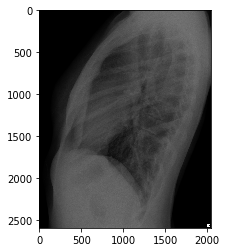

In [144]:
print(image.shape)

plt.imshow(arr_to_range(image, 0, 255), cmap='gray')

In [101]:
image.min(), image.max()

(0, 8191)

In [148]:
scaled_image = arr_to_range(image, 0, 255)
scaled_image.min(), scaled_image.max()

(0.0, 255.0)

In [146]:
fname = 'sample_file.png'

arr_to_range(image, 0, 255)
pil_image = Image.fromarray(scaled_image).convert('L')
pil_image.save(fname)

In [165]:
loaded_image = Image.open(fname)
loaded_image.size

(2041, 2592)

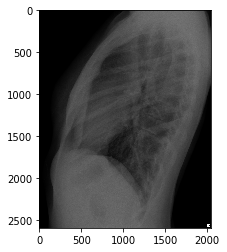

In [168]:
plt.imshow(loaded_image, cmap='gray')

In [117]:
np.min(loaded_image), np.max(loaded_image)

(0, 8191)

#### Dicom to images

In [411]:
%run ../../utils/common.py

In [69]:
from tqdm import tqdm # tqdm_notebook as tqdm

In [296]:
IMAGES_DIR = os.path.join(DATASET_DIR, 'images')

In [474]:
def split_date(date_str):
    year = date_str[:4]
    month = date_str[4:6]
    day = date_str[6:]
    return '-'.join(v for v in [year, month, day])
split_date('20200308')

In [541]:
def iter_dicom_images(data_dir, save_png=False, max_samples=None,
                      prev_images={},
                     ):
    errors = defaultdict(lambda: list())
    images_by_patient = defaultdict(lambda: list())
    result = []

    patients = sorted(os.listdir(data_dir))

    if max_samples:
        patients = patients[:max_samples]
    # patients = ['312', '315', '344', '351']
    # patients = ['185_2', '414', '582', '616']

    for patient_id in tqdm(patients):
        patient_id = str(patient_id)
        patient_folder = os.path.join(data_dir, patient_id)
        
        if patient_id in prev_images:
            # There are images present already!!
            image_counter = len(prev_images[patient_id])
        else:
            image_counter = 0

        for basepath, _, filenames in os.walk(patient_folder):
            for filename in sorted(filenames):
                filepath = os.path.join(basepath, filename)

                # Filter only RX
                filepath_clean = filepath.replace(data_dir, '').replace(patient_id, '')
                filepath_lower = filepath_clean.lower()
                is_other_scan = False
                for scan_type in ('scanner', 'tac', 'ecograf', 'prev'):
                    if scan_type in filepath_lower:
                        errors[scan_type].append(filepath_clean)
                        is_other_scan = True
                if is_other_scan:
                    continue
                
                if not filename.endswith('.dcm'):
                    errors['non-dcm'].append(filepath)
                    continue
                images_by_patient[patient_id].append(filename)

                # Read DICOM
                ds = pydicom.dcmread(filepath)

                try:
                    image = ds.pixel_array
                except AttributeError as e:
                    errors['broken'].append(filepath)
                    continue

                # Set image name and path
                image_name = '-'.join(str(s) for s in [patient_id, image_counter, filename[:-4]])
                image_name += '.png'

                # Read DICOM useful information
                try:
                    view_position = ds.ViewPosition
                except AttributeError as e:
                    view_position = ''
                    print('NO VIEW POSITION: ', filepath, image_name)
                date = split_date(ds.StudyDate)
                # transfer_syntax = ds.file_meta.TransferSyntaxUID.name

                # HACK: fill empty view positions
                if not view_position:
                    # Only valid for anon_3
                    if data_dir.endswith('anon_3'):
                        if image_name.startswith('312-0'):
                            view_position = 'AP'
                        else:
                            view_position = 'LL'
                    errors['missing-view'].append((filepath, image_name, view_position))

                # Save image to png
                if save_png:
                    image_filepath = os.path.join(IMAGES_DIR, image_name)
                    if os.path.isfile(image_filepath):
                        errors['overriden-image'].append((filepath, image_name))
                    scaled_image = arr_to_range(image, 0, 255)
                    pil_image = Image.fromarray(scaled_image).convert('L')
                    pil_image.save(image_filepath)

                # Save into main list
                result.append((patient_id, image_name, view_position, date))

                image_counter += 1

    return result, images_by_patient, errors

In [483]:
results_anon_3, i_by_p_anon_3, errors1 = iter_dicom_images(DATA_DIR_ANON_3,
                                                           save_png=False)

100%|██████████| 403/403 [01:19<00:00,  5.10it/s]


In [542]:
results_test_anon, i_by_p_test_anon, errors2 = iter_dicom_images(DATA_DIR_TEST_ANON,
                                                                 save_png=True,
                                                                 prev_images=i_by_p_anon_3,
                                                                )

100%|██████████| 200/200 [11:55<00:00,  3.58s/it]


##### Check errors

In [434]:
errors.keys()

['ecograf', 'scanner', 'broken', 'non-dcm', 'tac', 'prev']

In [450]:
def different_values(strings):
    values = set()
    for s in strings:
        for w in s.split('/'):
            if not w:
                continue
            values.add(w)
            break
    return values

In [455]:
different_values(errors['ecograf'])

{'Ecografia Abdominal'}

In [454]:
different_values(errors['prev'])

{'Examen Previo No Uc'}

In [453]:
different_values(errors['scanner'])

{'Scanner Cavidades Perinasales', 'Scanner De Torax', 'Scanner Tx-Abd-Pel'}

In [452]:
different_values(errors['tac'])

{'Angio Tac Por Tep(Tromboembolismo Pulmonar)',
 'Angio Tac Torax',
 'Angio Tac Torax Tep(Tromboembolismo Pulmonar)',
 'Tac Torax',
 'Tac Torax Alta Resolucion',
 'Tac Torax-Abdomen-Pelvis'}

In [456]:
results_2

[('10', '10-0-IM-0001-0001-0001.png', 'AP', '20200413'),
 ('10', '10-1-IM-0001-0001-0001.png', 'AP', '20200502'),
 ('10', '10-2-IM-0001-0001-0002.png', 'AP', '20200406'),
 ('10', '10-3-IM-0001-0001-0003.png', 'AP', '20200418'),
 ('10', '10-4-IM-0001-0001-0004.png', 'AP', '20200423'),
 ('10', '10-5-IM-0001-0001-0005.png', 'AP', '20200415'),
 ('10', '10-6-IM-0001-0001-0006.png', 'AP', '20200413'),
 ('10', '10-7-IM-0001-0001-0007.png', 'AP', '20200327'),
 ('10', '10-8-IM-0001-0001-0001.png', 'AP', '20200413'),
 ('10', '10-9-IM-0001-0001-0001.png', 'PA', '20180202'),
 ('10', '10-10-IM-0001-0001-0001.png', 'PA', '20180202'),
 ('104', '104-0-IM-0001-0001-0001.png', 'PA', '20200310'),
 ('104', '104-1-IM-0001-0001-0001.png', 'PA', '20200310'),
 ('106', '106-0-IM-0001-0001-0001.png', 'PA', '20200311'),
 ('106', '106-1-IM-0001-0001-0001.png', 'PA', '20200311'),
 ('11', '11-0-IM-0001-0001-0001.png', 'PA', '20200429'),
 ('11', '11-1-IM-0001-0002-0001.png', 'LL', '20200429'),
 ('113', '113-0-IM-000

#### DF with image information

In [491]:
columns = ['ID', 'image_name', 'view', 'date']

image_df_anon_3 = pd.DataFrame(results_anon_3, columns=columns)
image_df_anon_3.head()

,ID,image_name,view,date
0,1,1-0-IM-0001-0001-0001.png,PA,2020-03-04
1,1,1-1-IM-0001-0002-0001.png,LL,2020-03-04
2,100,100-0-IM-0001-0001-0001.png,PA,2020-03-08
3,100,100-1-IM-0001-0002-0001.png,LL,2020-03-08
4,101,101-0-IM-0001-0001-0001.png,AP,2020-03-08


In [492]:
image_df_test_anon = pd.DataFrame(results_test_anon, columns=columns)
image_df_test_anon.head()

,ID,image_name,view,date
0,10,10-0-IM-0001-0001-0001.png,AP,2020-04-13
1,10,10-1-IM-0001-0001-0001.png,AP,2020-05-02
2,10,10-2-IM-0001-0001-0002.png,AP,2020-04-06
3,10,10-3-IM-0001-0001-0003.png,AP,2020-04-18
4,10,10-4-IM-0001-0001-0004.png,AP,2020-04-23


In [502]:
set(image_df_test_anon['image_name']).intersection(image_df_anon_3['image_name'])

set()

In [499]:
len(image_df_anon_3), len(image_df_test_anon)

(679, 618)

In [501]:
image_df = image_df_anon_3.append(image_df_test_anon)
print(len(image_df))
image_df.head()

1297


,ID,image_name,view,date
0,1,1-0-IM-0001-0001-0001.png,PA,2020-03-04
1,1,1-1-IM-0001-0002-0001.png,LL,2020-03-04
2,100,100-0-IM-0001-0001-0001.png,PA,2020-03-08
3,100,100-1-IM-0001-0002-0001.png,LL,2020-03-08
4,101,101-0-IM-0001-0001-0001.png,AP,2020-03-08


##### Solve empty views

In [507]:
empty_view = image_df.loc[image_df['view'] == '']
print(' '.join(s for s in empty_view['image_name']))
empty_view

,ID,image_name,view,date


In [508]:
rl_view = image_df.loc[image_df['view'] == 'RL']
print(' '.join(s for s in rl_view['image_name']))
rl_view

185_2-1-IM-0001-0002-0001.png 414-1-IM-0001-0002-0001.png 582-1-IM-0001-0002-0001.png 616-1-IM-0001-0002-0001.png 245-2-IM-0001-0003-0001.png


,ID,image_name,view,date
80,185_2,185_2-1-IM-0001-0002-0001.png,RL,2020-03-26
311,414,414-1-IM-0001-0002-0001.png,RL,2020-04-05
539,582,582-1-IM-0001-0002-0001.png,RL,2020-04-14
604,616,616-1-IM-0001-0002-0001.png,RL,2020-03-09
256,245,245-2-IM-0001-0003-0001.png,RL,2020-05-15


In [261]:
Counter(image_df['view'])

Counter({'': 5, 'AP': 155, 'LL': 239, 'PA': 276, 'RL': 4})

##### Solve repeated images

In [509]:
[(k, v) for (k, v) in Counter(image_df['image_name']).items() if v > 1]

[]

##### Check same patients

In [510]:
image_df.loc[image_df['ID'].str.startswith('37')]

,ID,image_name,view,date
259,37,37-0-IM-0001-0001-0001.png,AP,2020-03-10
260,371,371-0-IM-0001-0001-0001.png,PA,2020-03-24
261,371,371-1-IM-0001-0002-0001.png,LL,2020-03-24
262,375,375-0-IM-0001-0001-0001.png,PA,2020-03-25
263,375,375-1-IM-0001-0002-0001.png,LL,2020-03-25
264,376,376-0-IM-0001-0001-0001.png,LL,2020-03-25
265,376,376-1-IM-0001-0002-0001.png,PA,2020-03-25
266,37_2,37_2-0-IM-0001-0001-0001.png,AP,2020-03-21
298,37,37-1-IM-0001-0001-0001.png,PA,2019-06-19
299,37,37-2-IM-0001-0001-0001.png,PA,2019-06-19


In [473]:
Counter(image_df['ID'])

Counter({'10': 11,
         '104': 2,
         '106': 2,
         '11': 2,
         '113': 3,
         '116': 3,
         '118': 1,
         '119': 1,
         '122': 2,
         '124': 2,
         '125': 2,
         '126': 3,
         '127': 4,
         '13': 2,
         '133': 7,
         '134': 2,
         '135': 5,
         '136': 1,
         '137': 3,
         '138': 3,
         '14': 7,
         '140': 3,
         '142': 3,
         '144': 1,
         '145': 3,
         '146': 1,
         '148': 1,
         '149': 8,
         '150': 1,
         '152': 1,
         '154': 1,
         '155': 1,
         '156': 3,
         '157': 3,
         '159': 1,
         '16': 2,
         '160': 1,
         '161': 1,
         '162': 2,
         '163': 4,
         '165': 1,
         '166': 1,
         '167': 6,
         '168': 3,
         '169': 8,
         '172': 1,
         '173': 1,
         '174': 5,
         '176': 1,
         '178': 5,
         '179': 7,
         '180': 3,
         '182': 

#### Merge with labels

In [511]:
cols = ['ID', 'Fecha consulta SU', 'Resultado consenso BSTI']
labels_df = main_df[cols]
labels_df.head()

,ID,Fecha consulta SU,Resultado consenso BSTI
0,1,2020-03-04,Indeterminado
1,2,2020-04-03,Indeterminado
2,3,2020-04-13,Indeterminado
3,4,2020-04-16,Indeterminado
4,5,2020-03-26,Indeterminado


##### Fix: use str types for ease of merge

In [512]:
labels_df['date'] = labels_df['Fecha consulta SU'].astype(str)
labels_df['ID'] = labels_df['ID'].astype(str)

labels_df['date'].dtypes

/home/pdpino/medical-report-generation/pyenv2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/pdpino/medical-report-generation/pyenv2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dtype('O')

In [513]:
labels_df.loc[labels_df['ID'] == '37']

,ID,Fecha consulta SU,Resultado consenso BSTI,date
517,37,2020-03-10,Normal,2020-03-10


##### Patient 185 vs 185_2

is reversed in labels_df

In [515]:
image_df.loc[image_df['ID'].str.startswith('185')]

,ID,image_name,view,date
78,185,185-0-IM-0001-0001-0001.png,AP,2020-03-11
79,185_2,185_2-0-IM-0001-0001-0001.png,AP,2020-03-26
80,185_2,185_2-1-IM-0001-0002-0001.png,RL,2020-03-26


In [514]:
labels_df.loc[labels_df['ID'].str.startswith('185')]

,ID,Fecha consulta SU,Resultado consenso BSTI,date
184,185,2020-03-26,Normal,2020-03-26
524,185_2,2020-03-11,Normal,2020-03-11


In [516]:
labels_df.loc[184, 'ID'] = '185_2'
labels_df.loc[524, 'ID'] = '185'

In [517]:
labels_df.loc[labels_df['ID'].str.startswith('185')]

,ID,Fecha consulta SU,Resultado consenso BSTI,date
184,185_2,2020-03-26,Normal,2020-03-26
524,185,2020-03-11,Normal,2020-03-11


##### Merge!

In [518]:
merged = labels_df.merge(image_df, how='right',
                         left_on=['ID', 'date'], # Fecha consulta SU
                         right_on=['ID', 'date']
                        )
merged.head()

,ID,Fecha consulta SU,Resultado consenso BSTI,date,image_name,view
0,1,2020-03-04,Indeterminado,2020-03-04,1-0-IM-0001-0001-0001.png,PA
1,1,2020-03-04,Indeterminado,2020-03-04,1-1-IM-0001-0002-0001.png,LL
2,2,2020-04-03,Indeterminado,2020-04-03,2-0-IM-0001-0001-0001.png,AP
3,3,2020-04-13,Indeterminado,2020-04-13,3-2-IM-0001-0001-0001.png,AP
4,4,2020-04-16,Indeterminado,2020-04-16,4-0-IM-0001-0001-0001.png,AP


In [535]:
Counter(merged[LABEL_COL])

Counter({nan: 398,
         u'Indeterminado': 16,
         u'Non-COVID': 98,
         u'Normal': 757,
         u'Sugerente COVID': 28})

In [519]:
len(merged)

1297

In [520]:
clean_df = merged[merged[LABEL_COL] != 'Indeterminado']

# clean_df.replace('Non-COVID', 'pneumonia', inplace=True)
clean_df.replace('Normal', 'normal', inplace=True)
clean_df.replace('Sugerente COVID', 'covid', inplace=True)
clean_df.tail()

,ID,Fecha consulta SU,Resultado consenso BSTI,date,image_name,view
1292,9,NaT,NaN,2020-03-20,9-0-IM-0001-0001-0001.png,AP
1293,9,NaT,NaN,2020-03-25,9-1-IM-0001-0001-0001.png,AP
1294,9,NaT,NaN,2020-03-29,9-2-IM-0001-0001-0001.png,AP
1295,96,NaT,NaN,2020-03-07,96-0-IM-0001-0001-0001.png,PA
1296,96,NaT,NaN,2020-03-07,96-1-IM-0001-0002-0001.png,LL


In [521]:
len(clean_df)

1281

In [533]:
clean_df.head()

,ID,Fecha consulta SU,Resultado consenso BSTI,date,image_name,view
16,15,2020-03-01,Non-COVID,2020-03-01,15-0-IM-0001-0001-0001.png,AP
17,17,2020-03-02,Non-COVID,2020-03-02,17-0-IM-0001-0001-0001.png,PA
18,17,2020-03-02,Non-COVID,2020-03-02,17-1-IM-0001-0001-0001.png,PA
19,18,2020-03-02,Non-COVID,2020-03-02,18-0-IM-0001-0001-0001.png,AP
20,19,2020-03-03,Non-COVID,2020-03-03,19-0-IM-0001-0001-0001.png,PA


##### Revisar NaN

In [526]:
clean_df.loc[clean_df[LABEL_COL] != clean_df[LABEL_COL]]

,ID,Fecha consulta SU,Resultado consenso BSTI,date,image_name,view
899,10,NaT,NaN,2020-04-13,10-0-IM-0001-0001-0001.png,AP
900,10,NaT,NaN,2020-04-13,10-6-IM-0001-0001-0006.png,AP
901,10,NaT,NaN,2020-04-13,10-8-IM-0001-0001-0001.png,AP
902,10,NaT,NaN,2020-05-02,10-1-IM-0001-0001-0001.png,AP
903,10,NaT,NaN,2020-04-06,10-2-IM-0001-0001-0002.png,AP
904,10,NaT,NaN,2020-04-18,10-3-IM-0001-0001-0003.png,AP
905,10,NaT,NaN,2020-04-23,10-4-IM-0001-0001-0004.png,AP
906,10,NaT,NaN,2020-04-15,10-5-IM-0001-0001-0005.png,AP
907,10,NaT,NaN,2020-03-27,10-7-IM-0001-0001-0007.png,AP
908,10,NaT,NaN,2018-02-02,10-9-IM-0001-0001-0001.png,PA


In [527]:
clean_df.dropna(axis=0, how='any', inplace=True)

/home/pdpino/medical-report-generation/pyenv2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [528]:
clean_df.head()

,ID,Fecha consulta SU,Resultado consenso BSTI,date,image_name,view
16,15,2020-03-01,Non-COVID,2020-03-01,15-0-IM-0001-0001-0001.png,AP
17,17,2020-03-02,Non-COVID,2020-03-02,17-0-IM-0001-0001-0001.png,PA
18,17,2020-03-02,Non-COVID,2020-03-02,17-1-IM-0001-0001-0001.png,PA
19,18,2020-03-02,Non-COVID,2020-03-02,18-0-IM-0001-0001-0001.png,AP
20,19,2020-03-03,Non-COVID,2020-03-03,19-0-IM-0001-0001-0001.png,PA


##### Revisar cantidades

In [530]:
Counter(clean_df.loc[clean_df['view'].str.contains('P')][LABEL_COL])

Counter({u'Non-COVID': 74, 'covid': 24, 'normal': 517})

In [532]:
Counter(clean_df[LABEL_COL])

Counter({u'Non-COVID': 98, 'covid': 28, 'normal': 757})

In [531]:
Counter(labels_df[LABEL_COL])

Counter({u'Indeterminado': 14,
         u'Non-COVID': 75,
         u'Normal': 525,
         u'Sugerente COVID': 26})

#### Save

In [534]:
metadata_path = os.path.join(DATASET_DIR, 'metadata.csv')
clean_df.to_csv(metadata_path)

### Read metadatas

In [538]:
df = pd.read_csv(os.path.join(DATASET_DIR, 'metadata_anon_3.csv'), index_col=0)
df.head()

,ID,Fecha consulta SU,Resultado consenso BSTI,date,image_name,view
6,15,2020-03-01,Non-COVID,2020-03-01,15-0-IM-0001-0001-0001.png,AP
7,17,2020-03-02,Non-COVID,2020-03-02,17-0-IM-0001-0001-0001.png,PA
8,17,2020-03-02,Non-COVID,2020-03-02,17-1-IM-0001-0001-0001.png,PA
9,18,2020-03-02,Non-COVID,2020-03-02,18-0-IM-0001-0001-0001.png,AP
10,19,2020-03-03,Non-COVID,2020-03-03,19-0-IM-0001-0001-0001.png,PA


In [539]:
Counter(df[LABEL_COL])

Counter({'Non-COVID': 50, 'covid': 4, 'normal': 619})

In [ ]:
# RESULTS ANON_3

### IMAGE SIZE 256

## FRONTAL ONLY

{'acc': 0.47306791569086654,                                                                                                        
         'cm': tensor([[  1,   1,   1],                                                                                                     
        [ 14,   9,   9],                                                                                                                    
        [145,  57, 190]]),                                                                                                                  
         'loss': 2.7440714836120605,                                                                                                        
         'prec_Non-COVID': 0.16279069767441862,                                                                                             
         'prec_covid': 0.005555555555555556,                                                                                                
         'prec_normal': 0.9509803921568627,                                                                                                 
         'recall_Non-COVID': 0.21875,                                                                                                       
         'recall_covid': 0.3333333333333333,                                                                                                
         'recall_normal': 0.49489795918367346,                                                                                              
         'spec_Non-COVID': 0.9088607594936708,                                                                                              
         'spec_covid': 0.5778301886792453,                                                                                                  
         'spec_normal': 0.7142857142857143}


## RESULTS ANON_3 FRONTAL + LATERAL
{'acc': 0.3447251114413076,
         'cm': tensor([[  1,   3,   0],
        [ 25,  16,   9],
        [253, 151, 215]]),
         'loss': 2.953134059906006,
         'prec_Non-COVID': 0.12396694214876033,
         'prec_covid': 0.003067484662576687,
         'prec_normal': 0.9557522123893806,
         'recall_Non-COVID': 0.3,
         'recall_covid': 0.25,
         'recall_normal': 0.34894991922455576,
         'spec_Non-COVID': 0.8298555377207063,
         'spec_covid': 0.5142002989536621,
         'spec_normal': 0.8148148148148148}

In [ ]:
### IMAGE SIZE 512

### FRONTAL ONLY
{'acc': 0.3185011709601874,
         'cm': tensor([[  3,   0,   0],
        [ 20,   6,   6],
        [233,  28, 131]]),
         'loss': 3.2618606090545654,
         'prec_Non-COVID': 0.21739130434782608,
         'prec_covid': 0.011111111111111112,
         'prec_normal': 0.9552238805970149,
         'recall_Non-COVID': 0.15625,
         'recall_covid': 1.0,
         'recall_normal': 0.32653061224489793,
         'spec_Non-COVID': 0.9544303797468354,
         'spec_covid': 0.37028301886792453,
         'spec_normal': 0.8285714285714286}

## FRONTAL + LATERAL
{'acc': 0.24071322436849926,                                                                                                        
         'cm': tensor([[  2,   2,   0],                                                                                                     
        [ 24,  21,   5],                                                                                                                    
        [303, 160, 156]]),                                                                                                                  
         'loss': 5.56564998626709,                                                                                                          
         'prec_Non-COVID': 0.11875,                                                                                                         
         'prec_covid': 0.005449591280653951,                                                                                                
         'prec_normal': 0.9657534246575342,                                                                                                 
         'recall_Non-COVID': 0.38,                                                                                                          
         'recall_covid': 0.5,                                                                                                               
         'recall_normal': 0.22778675282714056,                                                                                              
         'spec_Non-COVID': 0.7736757624398074,                                                                                              
         'spec_covid': 0.45440956651718983,                                                                                                 
         'spec_normal': 0.9074074074074074}